# Homework 1
### Paula Juliana Parra Osorio

## Punto 1

### Relacionado con la naturaleza de los datos, ¿qué condiciones deben tener las matrices A y b para poder resolverse por medio de mínimos cuadrados?

Los datos de la matriz A, es decir, las variables predictoras, deben ser de tipo cuantitativo. Además, las variables predictoras no deben estar relacionadas entre ellas. Esto se debe tener porque, para que la inversa de la matriz $A^TA$ exista y sea única, la matriz debe ser de rango completo, por lo que las filas o columnas de la matriz deben ser linealmente independientes. Si las variables predictoras fueran de tipo categórico, las columnas de la matriz A serían unos y ceros; además, estas serían una combinación lineal de la categoría correspondiente, por lo que la matriz no sería de rango completo. 

La única restricción de la matriz b es que debe tener el mismo número de filas que la matriz A.

## Punto 2

### Usar mínimos cuadrados para modelos no lineales. Ajustar el precio de bitcoin y predecir el precio una semana por delante. Comparar con los valores reales. 

Para ajustar el modelo, se utiliza el precio de cierre de mercado desde el 18 de marzo de 2021 hasta el 11 de marzo de 2022. Los datos fueron extraidos de https://markets.businessinsider.com/. Se comparará con los valores reales del 12 al 18 de marzo de 2022. 

#### Librerías necesarias

In [1]:
using CSV
using DataFrames
using IJulia
using Plots

#### Carga de base de datos

In [2]:
dataBitcoin = CSV.read("D:/Downloads/DataBitcoin.csv",DataFrame);
dataBitcoin.Close .= replace.(dataBitcoin.Close, "," => ".");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Close);

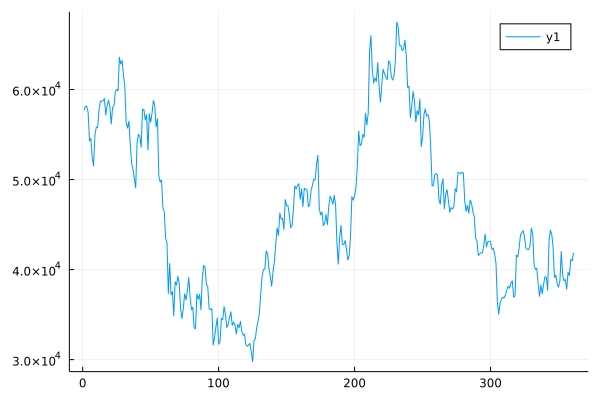

In [3]:
plot(dataBitcoin.PriceFloat)

El gráfico muestra que el precio del bitcoin parece seguir el comportamiento de una función trigonométrica, por lo que se intentará ajustar por medio de mínimos cuadrados una función de la forma

$a \cos(x) + b$

In [4]:
N = size(dataBitcoin.PriceFloat,1)-7;
A = Array((1:N));
b = Array(dataBitcoin.PriceFloat[1:N]);
A = [ones(N,1) cos.(A)];

In [5]:
p = A\b

2-element Vector{Float64}:
 46839.15563155868
  -232.9942383921059

In [6]:
F = Array{Float64}(undef,8)
for i in 354:361
    j = i-353
    F[j] = p[2]*cos(i) + p[1]
end

In [7]:
[F dataBitcoin.PriceFloat[354:361]]

8×2 Matrix{Float64}:
 46965.0  38764.9
 47072.1  38891.0
 46965.0  37830.2
 46742.2  39700.7
 46608.5  39350.3
 46686.9  41132.9
 46905.3  40964.7
 47062.9  41845.2

El modelo está sobreestimando el precio de Bitcoin. 

## Punto 3

### Usar mínimos cuadrados para determinar la relación entre el precio del bitcoin y los precios del petróleo, plata y oro durante el último año.

#### Carga de datos

In [8]:
dataPlata = CSV.read("D:/Downloads/DataPlata.csv",DataFrame);
dataPlata.Close .= replace.(dataPlata.Close, "," => ".");
dataPlata.PriceFloatPlata = parse.(Float64, dataPlata.Close);

dataOro = CSV.read("D:/Downloads/DataOro.csv",DataFrame);
dataOro.Close .= replace.(dataOro.Close, "," => ".");
dataOro.PriceFloatOro = parse.(Float64, dataOro.Close);

dataPetroleo = CSV.read("D:/Downloads/DataPetroleo.csv",DataFrame);
dataPetroleo.Close .= replace.(dataPetroleo.Close, "," => ".");
dataPetroleo.PriceFloatPetroleo = parse.(Float64, dataPetroleo.Close);

In [9]:
data = innerjoin(dataBitcoin, dataPlata, dataOro, dataPetroleo, on = :Date, makeunique=true)
N = size(data.PriceFloat,1);

#### Ajuste del modelo

Para ajustar el modelo, se crea la matriz A que tiene una columna de unos para ajustar el intercepto y 3 columnas correspondientes a los precios de plata, oro y petróleo. 

In [10]:
A = [ones(N, 1) data.PriceFloatPlata data.PriceFloatOro data.PriceFloatPetroleo];
b = data.PriceFloat;

Se ajustan los coeficientes por medio de la descomposición QR. 

In [11]:
p = A\b;

#### Resultado

In [12]:
println("Intercepto = ", p[1])
println("Coeficiente plata = ", p[2])
println("Coeficiente oro = ", p[3])
println("Coeficiente petróleo = ", p[4])

Intercepto = 150549.74867401502
Coeficiente plata = -772.1128977027489
Coeficiente oro = -44.99091540955518
Coeficiente petróleo = -42.3393760408995


Según el modelo ajustado por mínimos cuadrados, tanto el precio del oro como el de la plata y el petróleo tienen una relación negativa con el precio del bitcoin. Es decir, al subir el precio de alguno de estos commodities baja el precio del bitcoin. El precio de la plata es el que tiene la mayor afectación en el precio del bitcoin. 

## Punto 4

### Resolver el point set registration problem. 

In [13]:
using Images
using Interact
imagen = load("D:/Downloads/radiografía.jpg");

WebIO._IJuliaInit()

Para resolver el problema de point set se consideran 3 algoritmos de kernel:

* Laplaciano: Toma las derivadas en el espacio 2d para construir el kernel. 
* Gaussiano: Corresponde a un filtro 2d simétrico. 
* Desviación del Gaussiano: Corresponde a la resta del kernel Gaussiano con desviación $\sigma$ menos el kernel con desviación $\sqrt(2)*\sigma$. Este también arroja una matriz 2d simétrica.

In [14]:
@manipulate for dense=11:-1:1, kernel = Dict("Laplaciano" => 1, "Gaussiano" => 2, "DoG" => 3)
    if kernel == 1
        imfilter(imagen, Kernel.Laplacian())
    elseif kernel == 2
        imfilter(imagen, Kernel.gaussian(dense))
    else
        imfilter(imagen, Kernel.DoG(dense))
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["dense"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 11, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
6, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\ASUS\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\ASUS\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\ASUS\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\ASUS\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\ASUS\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007b479f10, Task (runnable) @0x000000007b479f10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"11\",\"10\",\"9\",\"8\",\"7\",\"6\",\"5\",\"4\",\"3\",\"2\",\"1\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"12495173737476441690\",\"id\":\"15069859035698604644\",\"type\":\"observable\"}),\"index\":

El algoritmo que mejor capta los bordes del objeto de la imagen es el Laplaciano. 